In [67]:
import pandas as pd

In [68]:
df=pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [70]:
df.shape

(32, 12)

In [71]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# A couple of more steps...

# Check Linearity

In [72]:
df.corr().mpg# check correlation with respect to the target and set corr value 0.7

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

In [73]:
# highly correlated
df_select=df.loc[:,['cyl','disp','hp','wt','mpg']]# also select target mpg bcz it is also highly correlated
df_select.head()

,cyl,disp,hp,wt,mpg
0,6,160.0,110,2.620,21.0
1,6,160.0,110,2.875,21.0
2,4,108.0,93,2.320,22.8
3,6,258.0,110,3.215,21.4
4,8,360.0,175,3.440,18.7


# Normality

In [74]:
from scipy import stats

In [75]:
print(stats.skew(df_select.cyl))# value Between -1 and +1
print(stats.kurtosis(df_select.cyl))# value Between -1 and +1

-0.18312865234479678
-1.6809684168130405


In [76]:
print(stats.skew(df_select.disp))
print(stats.kurtosis(df_select.disp))

0.40027244847286664
-1.0896826570135087


In [77]:
print(stats.skew(df_select.hp))
print(stats.kurtosis(df_select.hp))

0.7614356361333623
0.05223272840399584


In [78]:
print(stats.skew(df_select.wt))
print(stats.kurtosis(df_select.wt))

0.44378553550607647
0.1724705401587352


In [79]:
print(stats.skew(df_select.mpg))
print(stats.kurtosis(df_select.mpg))

0.6404398640318834
-0.20053320971549793


In [80]:
df_select.drop('cyl' , axis=1 , inplace=True)
df_select.head()

,disp,hp,wt,mpg
0,160.0,110,2.620,21.0
1,160.0,110,2.875,21.0
2,108.0,93,2.320,22.8
3,258.0,110,3.215,21.4
4,360.0,175,3.440,18.7


# multicolinearity

In [81]:
df_select.corr()

,disp,hp,wt,mpg
disp,1.000000,0.790949,0.887980,-0.847551
hp,0.790949,1.000000,0.658748,-0.776168
wt,0.887980,0.658748,1.000000,-0.867659
mpg,-0.847551,-0.776168,-0.867659,1.000000


In [82]:
import seaborn as sns

<AxesSubplot:>

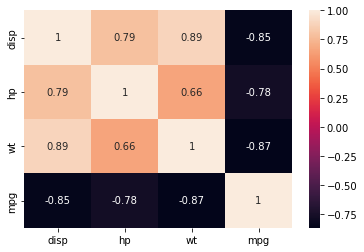

In [83]:
sns.heatmap(df_select.corr(),annot=True)

# seprate pridector and target

In [84]:
df_select.head()

,disp,hp,wt,mpg
0,160.0,110,2.620,21.0
1,160.0,110,2.875,21.0
2,108.0,93,2.320,22.8
3,258.0,110,3.215,21.4
4,360.0,175,3.440,18.7


In [85]:
X=df_select.iloc[:,:-1]#select all rows and columns columns expact last one
Y=df_select.mpg

In [86]:
X.head()

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320
3,258.0,110,3.215
4,360.0,175,3.440


In [87]:
Y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

# train test split

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=25)# 80% of data for training and 20% for testing by default train_test_split(X,Y) 75% training data and 25% testing
                                                                    #random_state=25 result will be same for everyone
    #random_state=25 we use bcz our data frame is to small it it is large than it will not affect results a lot

In [108]:
X_train.head()# split performed randomly

,disp,hp,wt
28,351.0,264,3.17
10,167.6,123,3.44
9,167.6,123,3.44
0,160.0,110,2.62
6,360.0,245,3.57


In [109]:
X.shape

(32, 3)

In [110]:
X_train.shape

(25, 3)

In [111]:
X_test.shape

(7, 3)

In [112]:
X_test.head()

,disp,hp,wt
14,472.0,205,5.250
11,275.8,180,4.070
29,145.0,175,2.770
25,79.0,66,1.935
24,400.0,175,3.845


## train model

In [113]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,Y_train)# training our model

LinearRegression()

# Evaluating model

In [114]:
X_test.head()#472.0	205	5.250 if we have these predictors we expect mpg10.4 and so on

,disp,hp,wt
14,472.0,205,5.250
11,275.8,180,4.070
29,145.0,175,2.770
25,79.0,66,1.935
24,400.0,175,3.845


In [115]:
Y_test

14    10.4
11    16.4
29    19.7
25    27.3
24    19.2
2     22.8
21    15.5
Name: mpg, dtype: float64

In [116]:
Y_predict=model.predict(X_test)# our first result is 10.4 but model predict it should be 9.839 and so on
Y_predict

array([ 9.83950088, 15.89999514, 21.52072599, 28.02094272, 16.26442183,
       25.68580867, 18.5817337 ])

In [117]:
from sklearn.metrics import r2_score#r2_score tells us how good the model is doing


In [118]:
r2_score(Y_test,Y_predict)# if it give 1 it means model is 100 % correct and if we run again from test split heading result will be different

0.8251782188559097